Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

In [15]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale


# DATA PREPRATION

## Reading The Data Set

In [16]:
#reading Dataset: specify sepearted by comma, encoded by ISO-8859-1 and header is 0
retail = pd.read_csv('/content/Online Retail.csv', sep=",", encoding="ISO-8859-1", header=0)

#print retil head
retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
# parse date into a format like "d-m-Y H:M"

# Format the date into "d-m-Y H:M"
retail['InvoiceDate'] = retail['InvoiceDate'].dt.strftime("%d-%m-%Y %H:%M")

# Print the first few rows
print(retail.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  


### Sanity Check

In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
# Convert 'InvoiceDate' to datetime format
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce')

In [20]:
null_percentage = (retail.isnull().sum() / len(retail)) * 100

null_percentage

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,57.011417
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [21]:
print(retail[retail['InvoiceDate'].isnull()])


       InvoiceNo StockCode                          Description  Quantity  \
26732     538521     21754             HOME BUILDING BLOCK WORD         3   
26733     538521     21755             LOVE BUILDING BLOCK WORD         3   
26734     538521     22072    RED RETROSPOT TEA CUP AND SAUCER          8   
26735     538521     22846           BREAD BIN DINER STYLE RED          1   
26736     538521     22849           BREAD BIN DINER STYLE MINT         1   
...          ...       ...                                  ...       ...   
516379   C579886     22197                       POPCORN HOLDER        -1   
516380   C579886     23146       TRIPLE HOOK ANTIQUE IVORY ROSE        -1   
516381   C579887     84946         ANTIQUE SILVER T-LIGHT GLASS        -1   
516382   C579887     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
516383   C579887     23490     T-LIGHT HOLDER HANGING LOVE BIRD        -3   

       InvoiceDate  UnitPrice  CustomerID         Country  
26732          

In [22]:
most_frequent_date = retail['InvoiceDate'].mode()[0]  # Get most common date
retail['InvoiceDate'] = retail['InvoiceDate'].fillna(most_frequent_date)


In [23]:
order_wise = retail.dropna(subset=['CustomerID'])


In [24]:
order_wise.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## RFM implementation

Extracting R(Recency), F(Frequency), M(Monetary) columns form the above data

In [25]:
# Ensure numeric values for calculations
#retail['Quantity'] = pd.to_numeric(retail['Quantity'], errors='coerce')
#retail['UnitPrice'] = pd.to_numeric(retail['UnitPrice'], errors='coerce')

# Calculate amount
Amount = order_wise['Quantity'] * order_wise['UnitPrice']

Amount.head()


,0
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


Monetary Value

In [26]:
monetary = order_wise.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index(name='TotalAmount')

monetary.head()

<ipython-input-26-11fac6549cf6>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monetary = order_wise.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index(name='TotalAmount')


,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Frequency value

In [27]:
# Extract frequency of orders per customer
frequency = order_wise.groupby('CustomerID', as_index=False)['InvoiceNo'].count()

# Rename the column for clarity
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


creating master data set

In [28]:
master = monetary.merge(frequency, on='CustomerID', how = 'inner')

master.head()

,CustomerID,TotalAmount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


## Recency Value

Generating Recency fucntion

In [29]:
order_wise = order_wise.copy()
order_wise['InvoiceDate'] = pd.to_datetime(order_wise['InvoiceDate'], errors='coerce')

# Filter order_wise to include only CustomerID and InvoiceDate
recency = order_wise[['CustomerID', 'InvoiceDate']]

# Step 2: Find the maximum InvoiceDate
maximum = recency['InvoiceDate'].max()



In [30]:

# Step 3: Add one day to the maximum date
maximum = maximum + pd.Timedelta(days=1)

# Step 4: Calculate the difference between the maximum date and each InvoiceDate
recency['diff'] = (maximum - recency['InvoiceDate']).dt.days

# Print the first few rows of recency
recency.head()

<ipython-input-30-ea2405a43e35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency['diff'] = (maximum - recency['InvoiceDate']).dt.days


,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374
1,17850.0,2010-12-01 08:26:00,374
2,17850.0,2010-12-01 08:26:00,374
3,17850.0,2010-12-01 08:26:00,374
4,17850.0,2010-12-01 08:26:00,374


In [31]:
recency.tail()

,CustomerID,InvoiceDate,diff
541904,12680.0,2011-12-09 12:50:00,1
541905,12680.0,2011-12-09 12:50:00,1
541906,12680.0,2011-12-09 12:50:00,1
541907,12680.0,2011-12-09 12:50:00,1
541908,12680.0,2011-12-09 12:50:00,1


In [32]:
maximum

Timestamp('2011-12-10 12:50:00')

In [33]:
# Group by 'CustomerID' and get the minimum 'diff' for each customer
df = recency.groupby('CustomerID', as_index=False)['diff'].min()

df.reset_index(drop=True, inplace=True)
# Rename columns
df.columns = ['CustomerID', 'Recency']

# Print the first few rows of df
df.head()

,CustomerID,Recency
0,12346.0,2
1,12347.0,2
2,12348.0,2
3,12349.0,2
4,12350.0,310


## RFM combined dataframe

Combining all recency, frequency and monetary parameters

In [34]:
RFM = master.merge(df, on='CustomerID', how = 'inner')

RFM.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,0.00,2,2
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,2
3,12349.0,1757.55,73,2
4,12350.0,334.40,17,310


## Outlier treatment

1. Outlier treatment for Amount

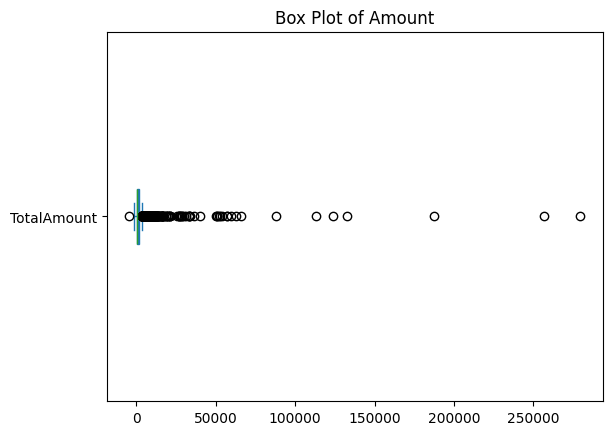

In [35]:
# Create a box plot for the 'Amount' column
RFM['TotalAmount'].plot(kind='box', vert=False, patch_artist=True, title='Box Plot of Amount')
plt.show()

In [36]:
# Calculate the 25th percentile (Q1)
Q1 = RFM['TotalAmount'].quantile(0.25)

# Calculate the 75th percentile (Q3)
Q3 = RFM['TotalAmount'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
RFM = RFM[(RFM['TotalAmount'] >= lower_bound) & (RFM['TotalAmount'] <= upper_bound)]


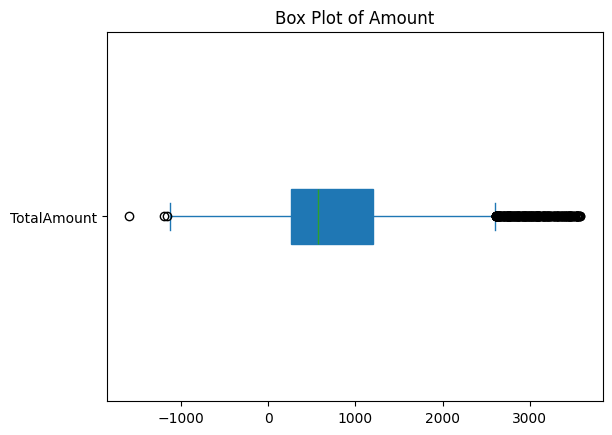

In [37]:
# Create a box plot for the 'Amount' column
RFM['TotalAmount'].plot(kind='box', vert=False, patch_artist=True, title='Box Plot of Amount')
plt.show()

2 - Outlier treatment for frequency

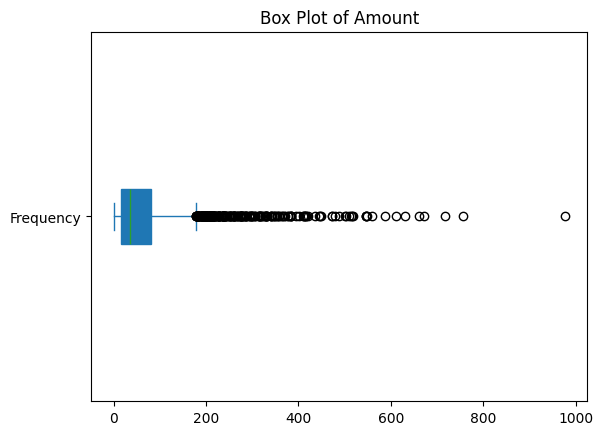

In [38]:
# Create a box plot for the 'Frequency' column
RFM['Frequency'].plot(kind='box', vert=False, patch_artist=True, title='Box Plot of Amount')
plt.show()

In [39]:
# Calculate the 25th percentile (Q1)
Q1 = RFM['Frequency'].quantile(0.25)

# Calculate the 75th percentile (Q3)
Q3 = RFM['Frequency'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
RFM = RFM[(RFM['Frequency'] >= lower_bound) & (RFM['Frequency'] <= upper_bound)]


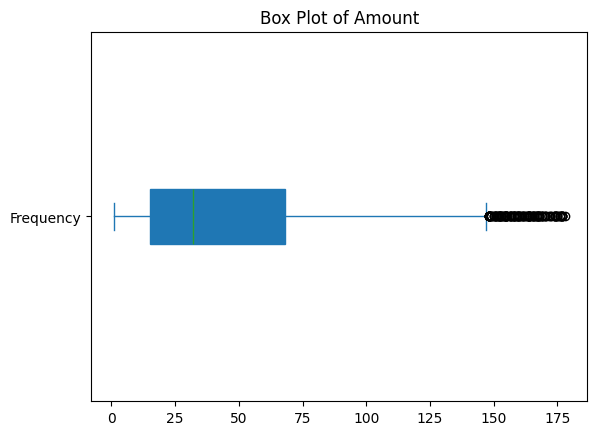

In [40]:
# Create a box plot for the 'Frequency' column
RFM['Frequency'].plot(kind='box', vert=False, patch_artist=True, title='Box Plot of Amount')
plt.show()

In [41]:
# Drop 'CustomerID' from RFM
RFM_norm1 = RFM.drop('CustomerID', axis=1)



In [42]:
RFM_norm1.head()

,TotalAmount,Frequency,Recency
0,0.00,2,2
2,1797.24,31,2
3,1757.55,73,2
4,334.40,17,310
5,1545.41,95,2


## Scaling the RFM data

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(RFM_norm1)

# Get column names from original DataFrame before it was modified
original_columns = RFM.drop('CustomerID', axis=1).columns

# Create a new DataFrame with the scaled data and original column names
RFM_norm1_scaled = pd.DataFrame(scaled_data, columns=original_columns)

# Display the first few rows of the scaled DataFrame
RFM_norm1_scaled.head()

,TotalAmount,Frequency,Recency
0,-1.041614,-1.070949,-0.384406
1,1.385298,-0.375498,-0.384406
2,1.331702,0.631707,-0.384406
3,-0.590055,-0.711233,3.220729
4,1.045238,1.159290,-0.384406


# Hopkins Statistics

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [45]:
# Function to calculate Hopkins score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [46]:
hopkins(RFM_norm1_scaled)



0.958344065124441

If we use 0.5 as the threshold to reject the alternative hypothesis. That is, if H < 0.5, then it is unlikely that Data has statistically significant clusters.

Put in other words, If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data. So here we can see possibility of clustering.

## K-Means with some K

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [47]:
from sklearn.cluster import KMeans

model_clus5 = KMeans(n_clusters=5, max_iter=50, random_state=1)

model_clus5.fit(RFM_norm1_scaled)


KMeans(max_iter=50, n_clusters=5, random_state=1)

In [48]:
# assingning the predicted labels to the data frame
RFM_norm1_scaled['Cluster'] = model_clus5.predict(RFM_norm1_scaled)


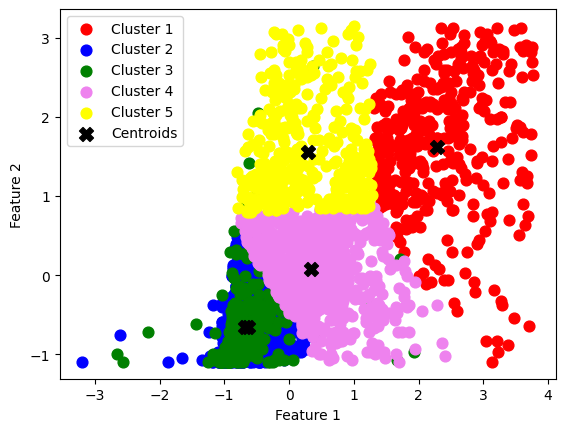

In [49]:
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'violet', 'yellow']

# Plot each cluster
for i in range(5):
    cluster_data = RFM_norm1_scaled[RFM_norm1_scaled['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], s=60, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
centroids = model_clus5.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids', marker='X')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the legend
plt.legend()

# Show the plot
plt.show()


## Optimal K value

Commonly used method for finding optimal K value is

* Silhouette Analysis


* Elbow Method.  


### ### Silhouette Analysis

silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)


𝑝
 is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞
 is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_scores = []


In [52]:
for k in range(2, 16):
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, max_iter=50, random_state=1)

    # Fit the model to your data (assuming RFM_norm1 is your DataFrame)
    kmeans.fit(RFM_norm1_scaled)

    # Predict the cluster labels
    cluster_labels = kmeans.predict(RFM_norm1_scaled)

    # Calculate the Silhouette Score
    score = silhouette_score(RFM_norm1, cluster_labels)

    # Append the score to the list
    silhouette_scores.append(score)


###### Visualise silhouette_score vs Number of Clusters

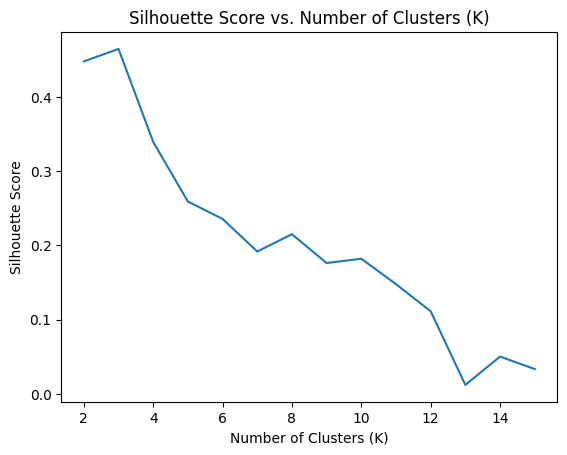

In [53]:
# Create a range of k values
k_values = range(2, 16)

# Plot the Silhouette Scores
plt.plot(k_values, silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


Above plot shows best silhouette_score on cluster number 4. Lets check another visualisation tool to confirm if k=4 is optimal

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

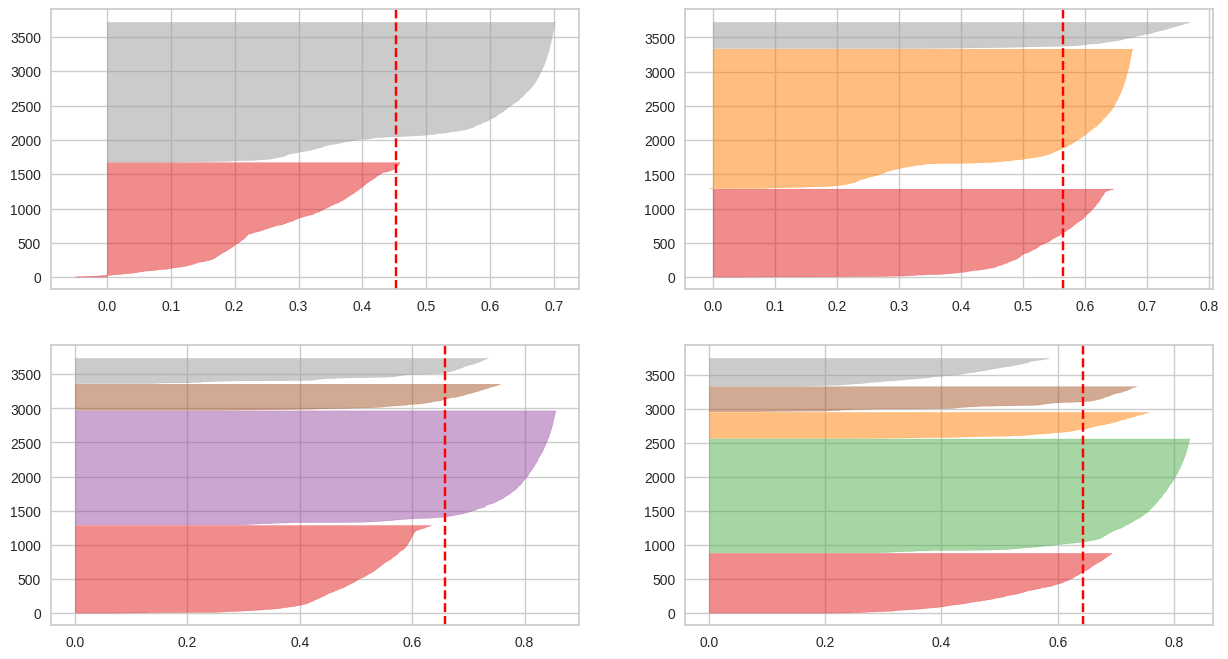

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance with specified parameters
    km = KMeans(n_clusters=i, n_init=10, max_iter=50, random_state=1)

    # Create SilhouetteVisualizer instance
    visualizer = SilhouetteVisualizer(km, ax=ax[(i-2)//2, (i-2)%2])

    # Fit the visualizer
    visualizer.fit(RFM_norm1_scaled)


The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with n_cluster 4 (bottom left), the thickness is more uniform than the plot with n_cluster as 5 (bottom right) with one cluster thickness much more than the other.

Thus, one can select the optimal number of clusters as 4.

## Sum of Squared Distances/ Elbow Method


This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach.
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.


In [56]:
ssd = [] # Initialise empty array to store score


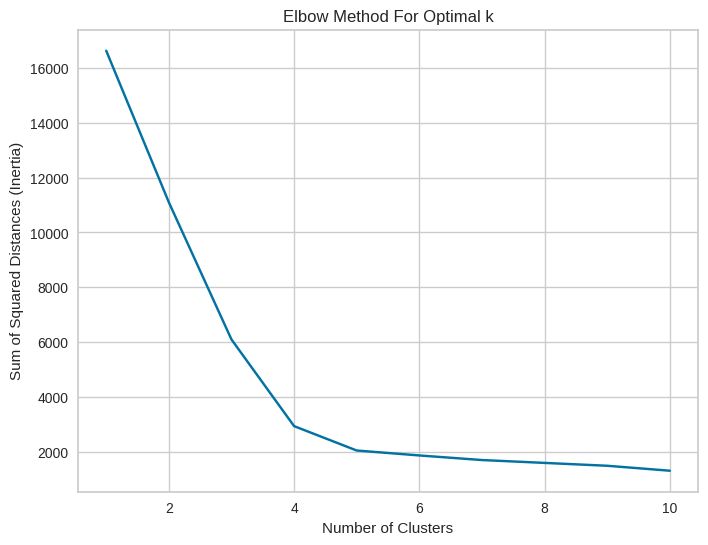

In [57]:
# iterate for different K-values
for num_clusters in list(range(1, 11)):
    # Instantiate KMeans for different k values with max_iter as 50 and random_state as 42
    model_clus = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)

    # Fit the model with RFM_norm1_scaled
    model_clus.fit(RFM_norm1_scaled)

    # Calculate sum of squared distances (inertia) and append to ssd
    ssd.append(model_clus.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

lets also use yellowbrick to identify visually

In [58]:
from yellowbrick.cluster import KElbowVisualizer

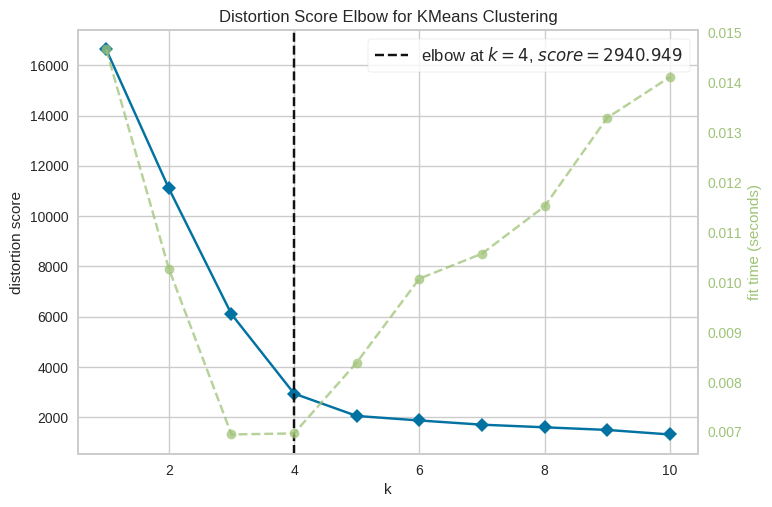

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# Initialize the KElbowVisualizer with KMeans model, k_range, and other parameters
elbow = KElbowVisualizer(model_clus, k=(1, 11))

# Fit the visualizer with RFM_norm1
elbow.fit(RFM_norm1_scaled)

# Show the elbow plot
elbow.show()

### Analysis of clusters formed

In [60]:
# Step 1: Set the index of RFM in the range of its length
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.index = range(len(RFM_norm1))

# Step 2: Create a series of labels for clusters
m = pd.Series(model_clus5.labels_, name='ClusterID')

# Step 3: Concatenate RFM and m columnwise
RFM_km = pd.concat([RFM_norm1, m], axis=1)

# Step 4: Name the columns as ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
RFM_km.columns = ['Frequency', 'Amount', 'Recency', 'ClusterID']

# Step 5: Convert 'Recency' to days only
#RFM_km['Recency'] = RFM_km['Recency'].dt.days

# Step 6: Create a dataframe for the mean amount for each group of ClusterID
km_clusters_amount = RFM_km.groupby('ClusterID')['Amount'].mean().reset_index()

# Step 7: Create a dataframe for the mean Frequency for each group of ClusterID
km_clusters_frequency = RFM_km.groupby('ClusterID')['Frequency'].mean().reset_index()

# Step 8: Create a dataframe for the mean Recency for each group of ClusterID
km_clusters_recency = RFM_km.groupby('ClusterID')['Recency'].mean().reset_index()




In [61]:
print(km_clusters_amount.shape, km_clusters_frequency.shape, km_clusters_recency.shape)

(5, 2) (5, 2) (5, 2)


In [62]:
km_clusters_amount = km_clusters_amount.drop('ClusterID', axis=1)
km_clusters_frequency = km_clusters_frequency.drop('ClusterID', axis=1)
km_clusters_recency = km_clusters_recency.drop('ClusterID', axis=1)

In [63]:
# Step 1: Create a Series with [0, 1, 2, 3, 4] for ClusterID
cluster_ids = pd.Series([0, 1, 2, 3, 4], name="ClusterID")

# Step 2: Concatenate the Series with the mean values for each cluster
df = pd.concat([cluster_ids, km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)

# Step 3: Name the columns
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]

# Step 4: Print the DataFrame
print(df)


   ClusterID  Amount_mean  Frequency_mean  Recency_mean
0          0   114.728947     2470.680003      2.721053
1          1    19.673457      308.483746     11.260635
2          2    19.283379      272.731499    274.782016
3          3    49.880137     1027.339088      5.756849
4          4   111.829630      982.642222      7.634568


<ipython-input-64-268a4c02faf0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ClusterID", y="Amount_mean", palette='viridis')


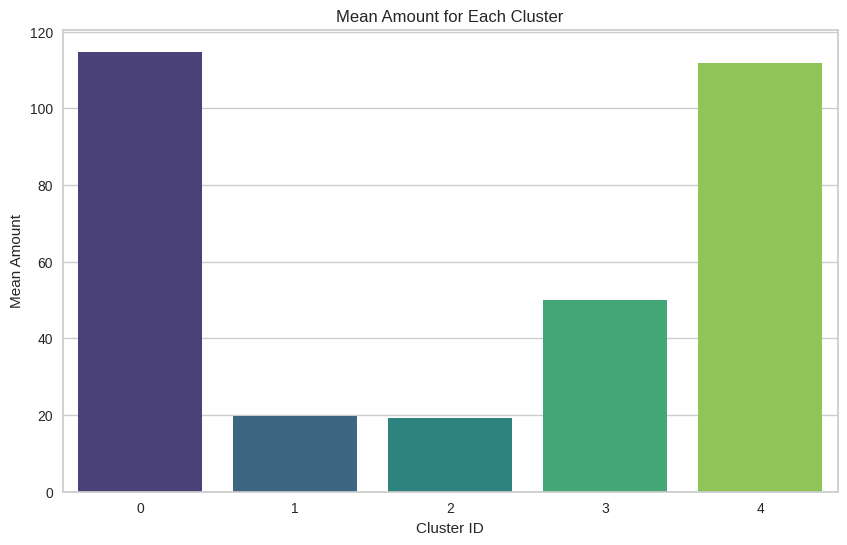

In [64]:
#barplot for each ClusterID w.r.t mean amount

import seaborn as sns

# Create a bar plot for each ClusterID with respect to the mean Amount
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x="ClusterID", y="Amount_mean", palette='viridis')

# Set labels and title
plt.xlabel('Cluster ID')
plt.ylabel('Mean Amount')
plt.title('Mean Amount for Each Cluster')

# Show plot
plt.show()



<ipython-input-65-c9229a57a06c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ClusterID", y="Frequency_mean", palette='viridis')


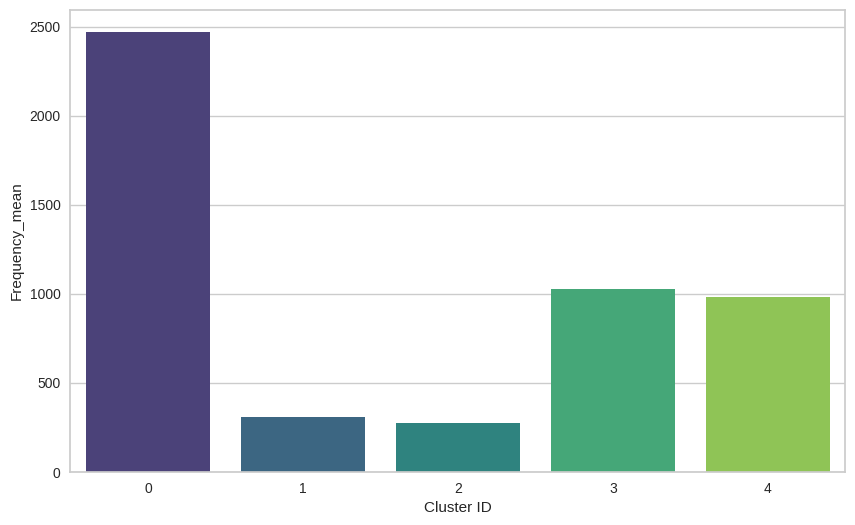

In [65]:
#barplot for each ClusterID w.r.t mean Frequency

# Create a bar plot for each ClusterID with respect to the mean Frequency
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x="ClusterID", y="Frequency_mean", palette='viridis')

# Set labels and title
plt.xlabel('Cluster ID')
plt.ylabel('Frequency_mean')

# Show plot
plt.show()


<ipython-input-66-161237c61309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ClusterID", y="Recency_mean", palette='viridis')


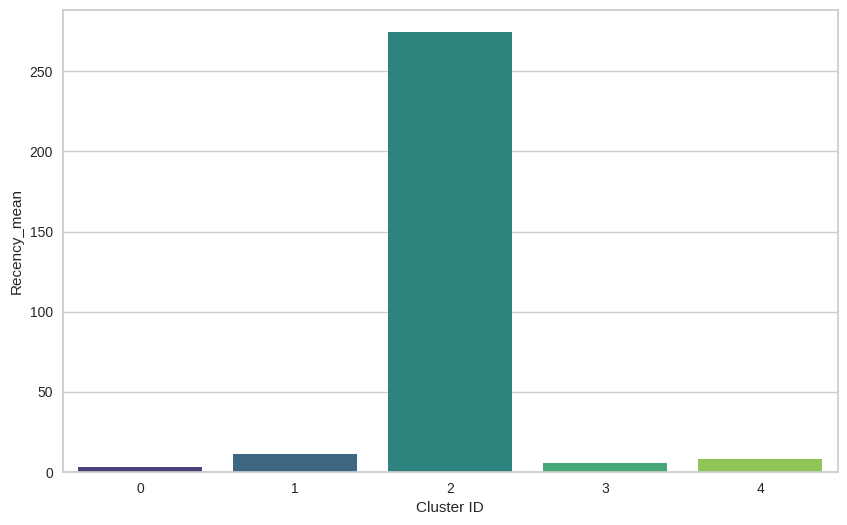

In [66]:
#barplot for each ClusterID w.r.t mean Recency

plt.figure(figsize=(10, 6))

sns.barplot(data=df, x="ClusterID", y="Recency_mean", palette='viridis')

# Set labels and title
plt.xlabel('Cluster ID')
plt.ylabel('Recency_mean')

# Show plot
plt.show()



 we have successfully implemented Kmeans clustering technique. From the the above bar plot we analysed that maximum mean Recency is at k =3 but maximum mean Frequency is at k =1 and amount at k=1 and 5

# ## Heirarchical Clustering

Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar. Before implementing hierarchical clustering using Scikit-Learn.

There are two types of hierarchical clustering:

* Agglomerative : data points are clustered using a bottom-up approach starting with individual data points
* Divisive.:  while in this top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.`

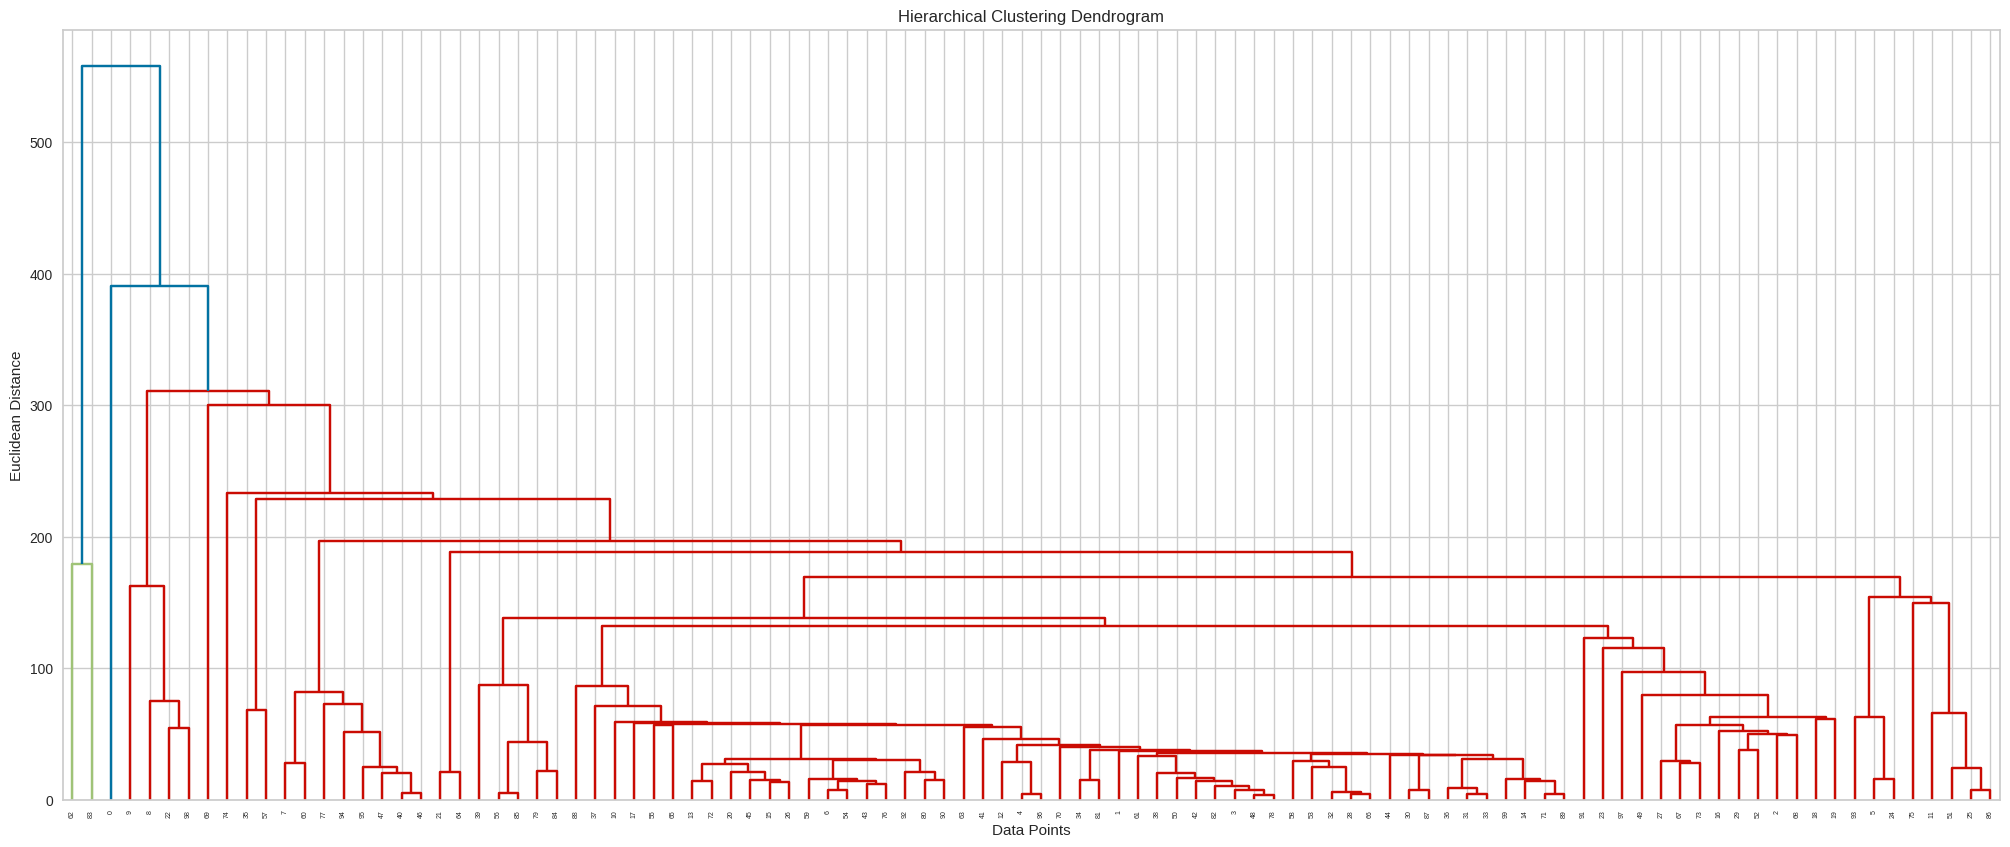

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Get a random sample of 100 from RFM_norm1 with random_state=10
RFM_Sample = RFM_norm1.sample(n=100, random_state=10)

# Step 2: Perform hierarchical clustering using single linkage and Euclidean distance
mergings = linkage(RFM_Sample, method='single', metric='euclidean')

# Step 3: Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(mergings)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


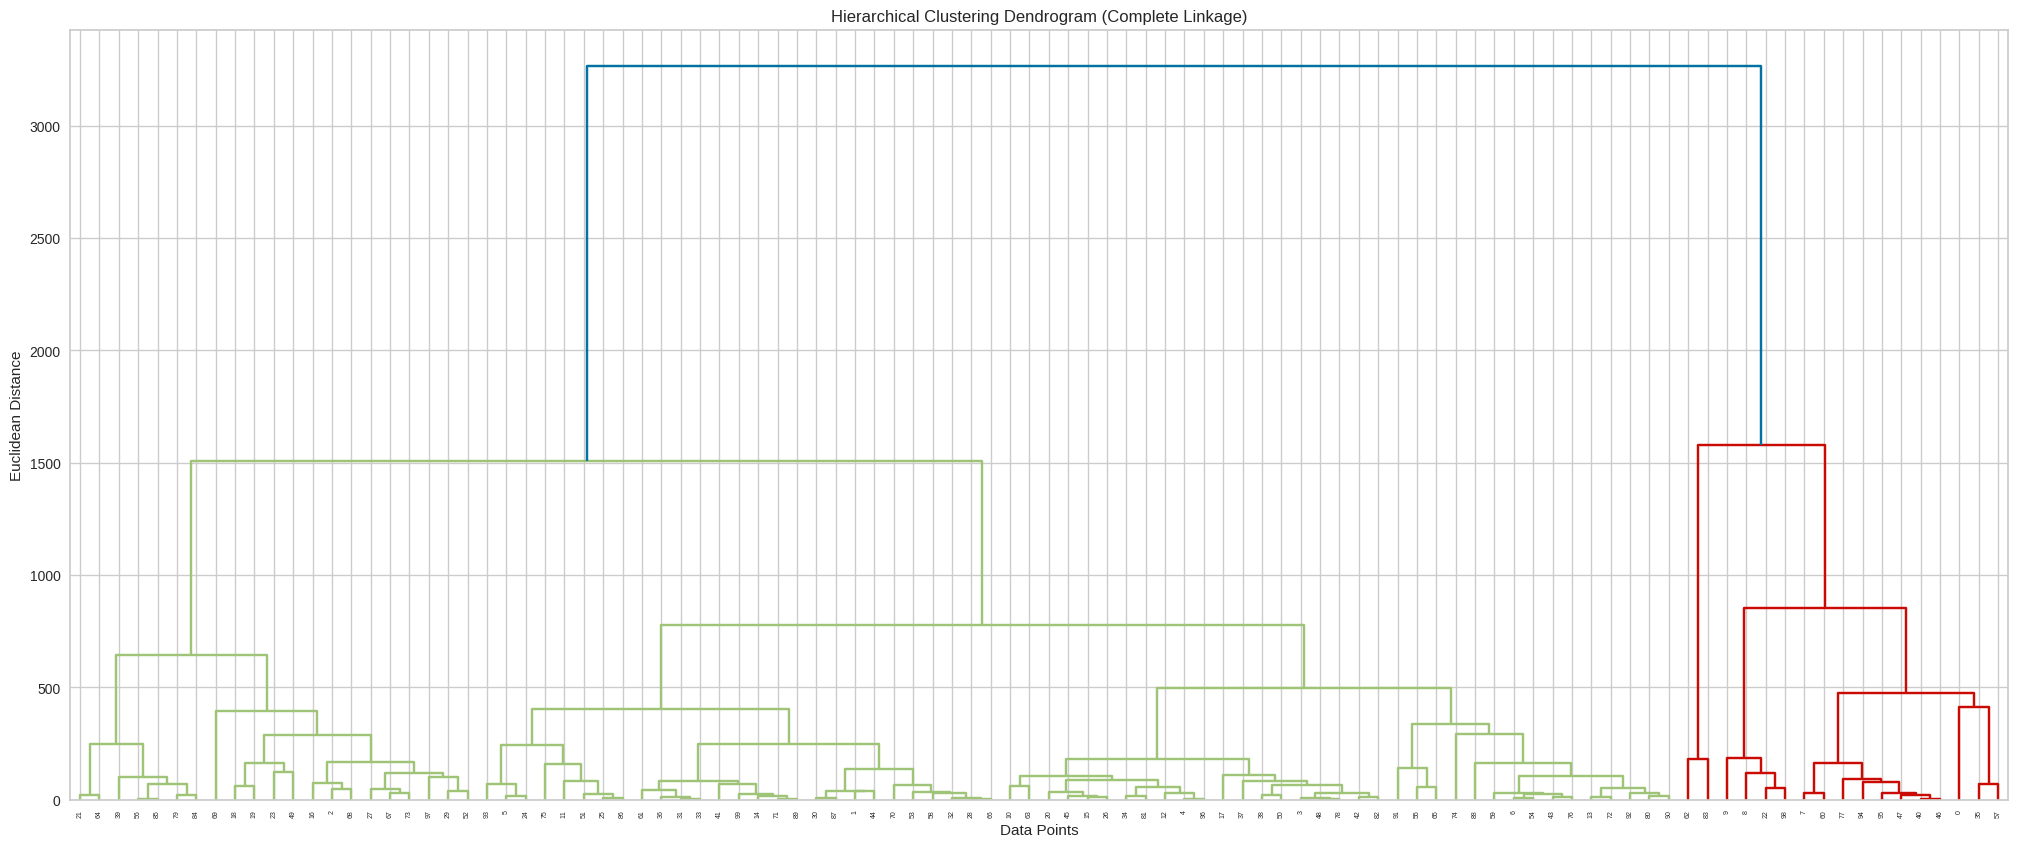

In [68]:
# Perform hierarchical clustering using method :- complete linkage and Euclidean distance
mergings = linkage(RFM_Sample, method='complete', metric='euclidean')

# Step 3: Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(mergings)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.show()


### Agglomerative Clustering
Now lets Generate our no. of clusters using Agglomerative Clustering method

In [70]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters
k = 3

# Instantiate AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')

#Fit the model to RFM_norm1
clus = cluster.fit(RFM_norm1)


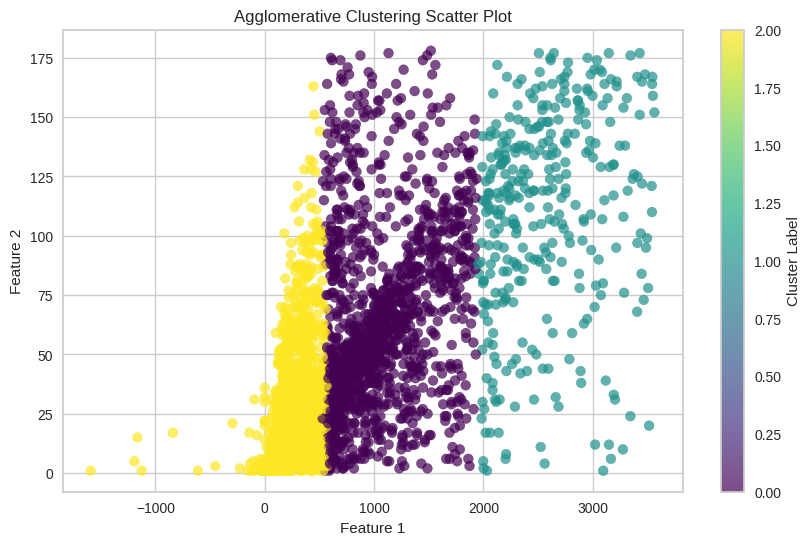

In [74]:
# Convert RFM_norm1 into a NumPy array
RFM_norm2 = np.array(RFM_norm1)

# Extract cluster labels
labels = clus.labels_

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(RFM_norm2[:, 0], RFM_norm2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering Scatter Plot')
plt.colorbar(label='Cluster Label')
plt.show()


In [75]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
sil_score = silhouette_score(RFM_norm2, clus.labels_)

# Print silhouette score
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5428870879953439


Interpreting the Silhouette Score
The score ranges from -1 to 1:

S(i)≈1 → Well-clustered (points are close to their own cluster, far from others).

## BIRCH

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm in machine learning that has been specially designed for clustering on a very large data set. It is often faster than other clustering algorithms like batch K-Means. It provides a very similar result to the batch K-Means algorithm if the number of features in the dataset is not more than 20.

When training the model using the BIRCH algorithm, it creates a tree structure with enough data to quickly assign each data point to a cluster. By storing all the data points in the tree, this algorithm allows the use of limited memory while working on a very large data set

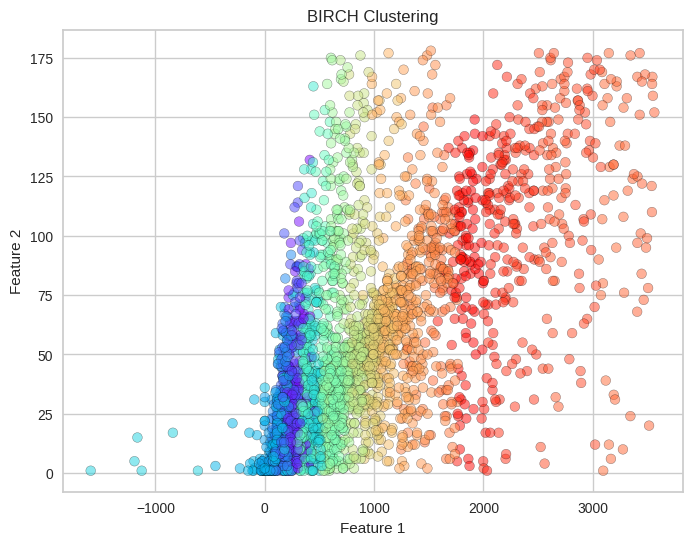

In [77]:
from sklearn.cluster import Birch

# Convert RFM_norm1 to a NumPy array if it's a DataFrame
RFM_array = np.array(RFM_norm1)  # OR use RFM_norm1.values

# Instantiate Birch
model = Birch(branching_factor=30, threshold=1.5, n_clusters=None)

# Fit the model
model.fit(RFM_array)

# Predict clusters
pred = model.predict(RFM_array)

# Scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(RFM_array[:, 0], RFM_array[:, 1], c=pred, cmap='rainbow', alpha=0.5, edgecolor='black')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('BIRCH Clustering')

plt.show()


In [78]:
# Calculate the silhouette score using the predicted cluster labels (pred)
sil_score = silhouette_score(RFM_array, pred)

# Print the Silhouette Score
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.12167785510412321


## DBSCAN

        
Density Based Spatial Clustering of Applications with Noise(DBCSAN) is a clustering algorithm. It can be used for clustering data points based on density, i.e., by grouping together areas with many samples. This makes it especially useful for performing clustering under noisy conditions: as we shall see, besides clustering, DBSCAN is also capable of detecting noisy points, which can – if desired – be discarded from the dataset.


In [79]:
from sklearn.cluster import DBSCAN

# Set the parameters for DBSCAN
epsilon = 1  # maximum distance between two samples to be considered as neighbors
min_samples = 13  # number of samples in a neighborhood to be considered a core point

# Instantiate and fit DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the model on your data (RFM_norm1 or any suitable dataset)
db.fit(RFM_norm1)

# You can access the labels of each point in the cluster using db.labels_
labels = db.labels_



In [80]:
# Check the number of unique labels (including noise label)
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise label (-1)

# Check the number of noise points (points labeled as -1)
no_noise = list(labels).count(-1)

# Print results
print(f"Number of clusters (excluding noise): {no_clusters}")
print(f"Number of noise points: {no_noise}")


Number of clusters (excluding noise): 0
Number of noise points: 3697


In [81]:
# Get numpy array of noise (using zeros_like with labels and dtype as bool)
sample_cores = np.zeros_like(labels, dtype=bool)

# Get values in sample_cores that are not noise
sample_cores[db.core_sample_indices_] = True

# Get the number of clusters by subtracting the length of labels with noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print(f"Number of clusters: {n_clusters}")


Number of clusters: 0


In [83]:
# Exclude noise points (label = -1)
valid_labels = labels != -1

# Check if there are at least 2 clusters
if len(np.unique(labels[valid_labels])) > 1:
    # Compute the silhouette score, excluding noise
    sil_score = silhouette_score(RFM_norm1[valid_labels], labels[valid_labels])
    print(f"Silhouette Score (excluding noise): {sil_score}")
else:
    print("Not enough clusters for silhouette score calculation.")


Not enough clusters for silhouette score calculation.


## Mini-Batch K-Means clustering

K-Means algorithmIt is a commonly used clustering algorithm, but its algorithm itself has certain problems. For example, the long calculation time under a large amount of data is an important problem. For this reason, Mini Batch K-Means, this variant clustering algorithm based on K-Means came into being

Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [84]:
# Import required libraries
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin, silhouette_score

# Perform MiniBatchKMeans with 3 clusters and random_state as 1
mbk = MiniBatchKMeans(n_clusters=3, random_state=1)

# Fit the model on RFM_norm1
mbk.fit(RFM_norm1)

# Sort cluster centers for each row (optional, for better visualization or analysis)
mbk_means_cluster_centers = sorted(mbk.cluster_centers_, key=lambda x: x[0])  # Sorting based on the first feature

# Get pairwise_distances_argmin with RFM_norm1 and mbk_means_cluster_centers
mbk_means_labels = pairwise_distances_argmin(RFM_norm1, mbk_means_cluster_centers)

# Print the labels assigned to each data point
print("Cluster Labels:", mbk_means_labels)

# Calculate silhouette score
sil_score = silhouette_score(RFM_norm1, mbk_means_labels)

# Print the silhouette score
print(f"Silhouette Score: {sil_score}")


Cluster Labels: [0 2 2 ... 0 0 2]
Silhouette Score: 0.5742858260279055


In [85]:
# Predict using the fitted MiniBatchKMeans model on RFM_norm1
yhat = mbk.predict(RFM_norm1)

# Retrieve unique clusters from the predicted labels
clusters = set(yhat)



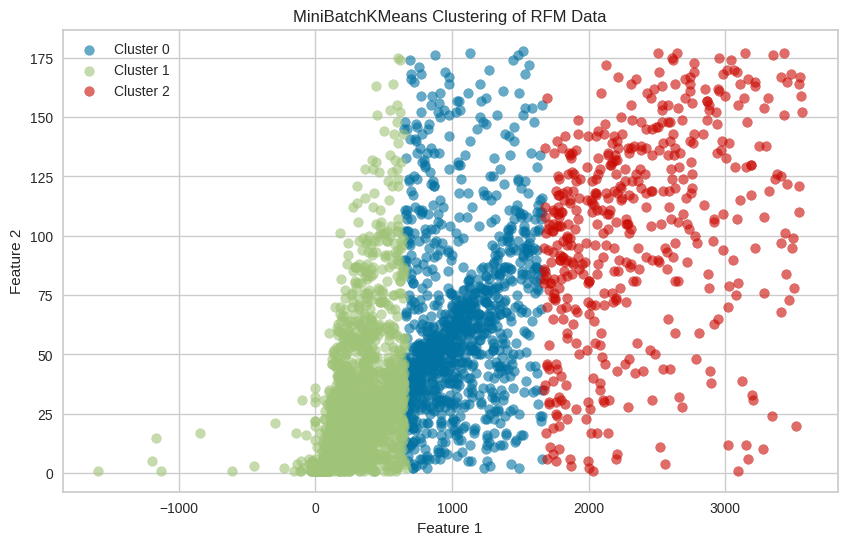

In [87]:
fig = plt.figure(figsize=(10, 6))

# Iterate over clusters
for cluster in clusters:
    # Get row indexes for samples with this cluster (use numpy-style indexing)
    row_ix = (yhat == cluster)

    # Scatter plot of these samples (Using RFM_norm1)
    plt.scatter(RFM_norm1.iloc[row_ix, 0], RFM_norm1.iloc[row_ix, 1], label=f'Cluster {cluster}', alpha=0.6)

# Add title and labels
plt.title('MiniBatchKMeans Clustering of RFM Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show legend
plt.legend()

# Show the plot
plt.show()


## Mean Shift Clustering Method    
        
Mean Shift clustering algorithm is an unsupervised clustering algorithm that groups data directly without being trained on labelled data. The nature of the Mean Shift clustering algorithm is heirarchical in nature, which means it builds on a heirarchy of clusters, step by step.

As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand. The downside to Mean Shift is that it is computationally expensive — O(n²).


In [88]:
# Import MeanShift
from sklearn.cluster import MeanShift

# Instantiate MeanShift
ms = MeanShift()

# Fit the model with RFM_norm2
ms.fit(RFM_norm1)

# Get cluster centers
cluster_centers = ms.cluster_centers_

# Print unique labels obtained
unique_labels = set(ms.labels_)
print("Unique labels (clusters):", unique_labels)


Unique labels (clusters): {0, 1}


Given a set of data points, the algorithm iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

So according to MeanShift in our case each data point has a common centroid, hence we got only one label

## OPTICS

OPTICS Clustering stands for Ordering Points To Identify Cluster Structure. It draws inspiration from the DBSCAN clustering algorithm. This is a density based clustering method.

Density based clusering locates regions of high density that are seperated from one another by regions of low density

Density =number of points within a specified radius (Eps)

Technically speaking, OPTICS isn’t actually a clustering algorithm. Instead, it creates an ordering of the cases in the data in such a way that we can extract clusters from it. That sounds a little abstract, isn't it.

In [89]:
# Import OPTICS
from sklearn.cluster import OPTICS

# Initialize and fit OPTICS on RFM_norm1
Ops = OPTICS()
Ops.fit(RFM_norm1)

# Get the labels obtained
labels = Ops.labels_


In [90]:
# Check length of unique labels (excluding noise label -1)
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Check the number of noise points (points labeled as -1)
no_noise = list(labels).count(-1)

# Print results
print(f"Number of clusters (excluding noise): {no_clusters}")
print(f"Number of noise points: {no_noise}")


Number of clusters (excluding noise): 211
Number of noise points: 1957


Omg! we have got so many distinct clusters here


Let's change parameters in OPTICS and run again keeping
- epsilon = 2.0
- min_samples = 30

In [92]:
# Initialize OPTICS with the given parameters
Ops = OPTICS(eps=2.0, min_samples=30)

# Fit the model to RFM_norm1
Ops.fit(RFM_norm1)

# Get the labels obtained from OPTICS
labels = Ops.labels_

# Check length of unique labels (excluding noise label -1)
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Check the number of noise points (points labeled as -1)
no_noise = list(labels).count(-1)

# Print the results
print(f"Number of clusters (excluding noise): {no_clusters}")
print(f"Number of noise points: {no_noise}")


Number of clusters (excluding noise): 3
Number of noise points: 3540


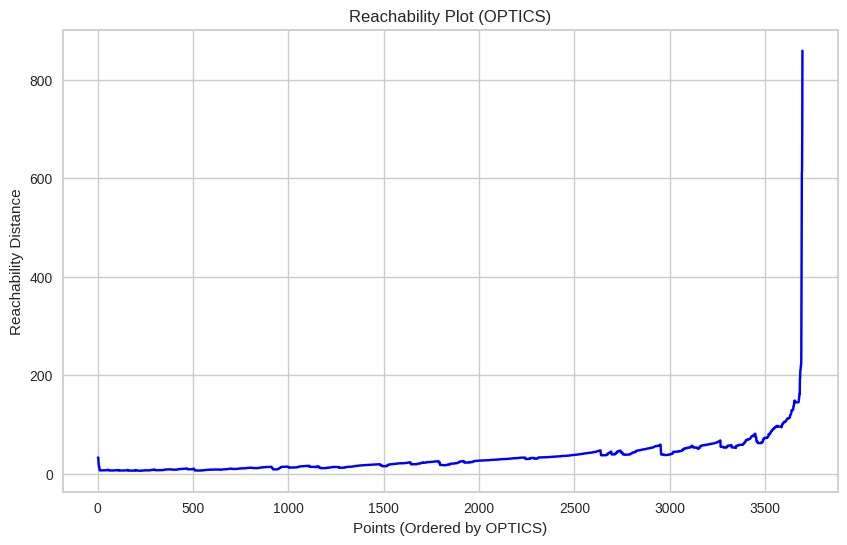

In [93]:
# Extract the reachability distances using the ordering_
reachability = Ops.reachability_[Ops.ordering_]

# Plot the reachability distances
plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), reachability, color='blue')
plt.title('Reachability Plot (OPTICS)')
plt.xlabel('Points (Ordered by OPTICS)')
plt.ylabel('Reachability Distance')
plt.show()


We saw that OPTICS works by ordering based on reachability distance while expanding the clusters at the same time. The output of the OPTICS algorithm is therefore an ordered list of reachability distances, which by means of thresholds or different techniques we can split into clusters. This way, we’re able of generating clusters for groups of data that have varying densities.

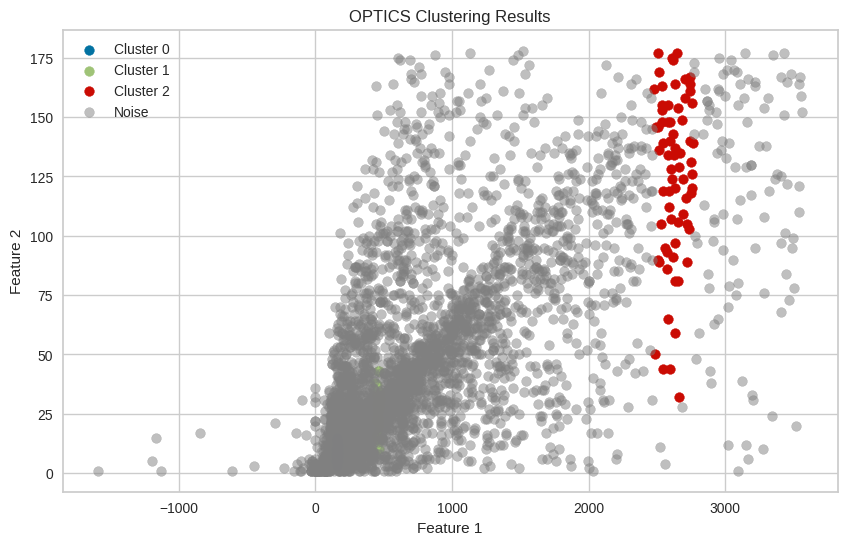

In [96]:
# Get the predicted labels (clusters) from the model
pred = Ops.labels_

# Create a plot for the clusters
fig = plt.figure(figsize=(10, 6))

# Iterate over unique labels (cluster IDs)
for cluster in set(pred):
    if cluster != -1:  # Exclude noise points (label -1)
        # Get the points belonging to the current cluster
        cluster_data = RFM_norm2[pred == cluster]

        # Plot the points of the current cluster
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Plot noise points with a different color
noise_data = RFM_norm2[pred == -1]
plt.scatter(noise_data[:, 0], noise_data[:, 1], color='gray', label='Noise', alpha=0.5)

# Add title, axis labels, and legend
plt.title('OPTICS Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


From above plot you can see that red portion is the only recognised cluster in the dataset and a very small amount of other as per OPTICS.


In [97]:
# Get unique labels and their counts
unique, counts = np.unique(pred, return_counts=True)

# Save the unique labels and their counts in a dictionary
label_counts = dict(zip(unique, counts))

# Print the dictionary
print(label_counts)


{-1: 3540, 0: 36, 1: 52, 2: 69}


here you can see large number of points are noice and same is represented in the bove plot as well.

In [102]:
# Remove the noise points labeled as -1
non_noise_labels = pred[pred != -1]
non_noise_data = RFM_norm1[pred != -1]

# Calculate silhouette score for non-noise points
sil_score = silhouette_score(non_noise_data, non_noise_labels)

# Print the silhouette score
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.9573570887096526


## Gaussian Mixture Model

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data


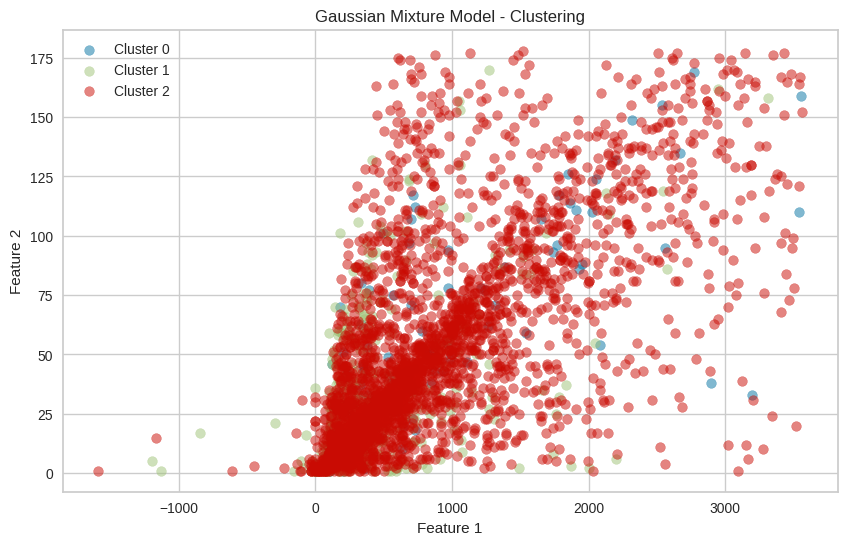

In [103]:
# Import GaussianMixture
from sklearn.mixture import GaussianMixture

# Instantiate GaussianMixture with random_state as 0, n_components as 3
gm = GaussianMixture(n_components=3, random_state=0)

# Fit the model on RFM_norm2
gm.fit(RFM_norm1)

# Get predictions from GMM
yhat = gm.predict(RFM_norm1)

# Get unique predicted clusters
clusters = set(yhat)

# Create a scatter plot
fig = plt.figure(figsize=(10, 6))

# Iterate over clusters
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = (yhat == cluster)

    # Create scatter plot for these samples
    plt.scatter(RFM_norm2[row_ix, 0], RFM_norm2[row_ix, 1], label=f"Cluster {cluster}", alpha=0.5)

# Add title and labels
plt.title("Gaussian Mixture Model - Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show legend
plt.legend()

# Show the plot
plt.show()


In [104]:
# Calculate the silhouette score for the GMM model based on the predictions (yhat)
sil_score = silhouette_score(RFM_norm2, yhat)

# Print the silhouette score
print(f"Silhouette Score: {sil_score}")


Silhouette Score: -0.0872827066235584
